In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

In [4]:
# '증권' 테마 종목파일 불러오기
upjong_list = pd.read_csv('./upjong_sort_20201006.csv')
bank_list = upjong_list[upjong_list['업종']=='증권']
bank_list = bank_list[bank_list['코스닥여부']=='N']
bank_list.drop('Unnamed: 0', axis=1, inplace = True)
bank_list = bank_list.reset_index()
bank_list.drop('index', axis=1, inplace = True)

In [5]:
# '증권'테마의 종목df를 묶음 저장하는 df_list 생성
df_list=[]

for i in range(len(bank_list)):
    code = bank_list['종목코드'][i]
    
    df = fdr.DataReader(code, '2019')
    df_list.append(df)    

In [87]:
df_list

[            Open  High   Low  Close   Volume    Change
 Date                                                  
 2019-01-02  3955  4350  3880   3965  1339833  0.053121
 2019-01-03  3825  3965  3415   3450  1150164 -0.129887
 2019-01-04  3540  3995  3350   3770  1242370  0.092754
 2019-01-07  3650  3875  3500   3575   987904 -0.051724
 2019-01-08  3575  3605  3220   3290   618024 -0.079720
 ...          ...   ...   ...    ...      ...       ...
 2020-10-13  5410  5420  5210   5370    45781  0.001866
 2020-10-14  5450  5590  5300   5300    87021 -0.013035
 2020-10-15  5400  5920  5200   5540   566021  0.045283
 2020-10-16  5550  6900  5550   5830  4324300  0.052347
 2020-10-19  5770  5770  5250   5430   516957 -0.068611
 
 [443 rows x 6 columns],
             Open  High   Low  Close   Volume    Change
 Date                                                  
 2019-01-02  1800  1890  1775   1850   197679  0.016484
 2019-01-03  1880  1880  1780   1830   179245 -0.010811
 2019-01-04  1800  18

In [6]:
# '증권' 테마의 2019~2020 평균 종가 'bank_close'
close = 0
for i in range(len(df_list)):        
    close = close + df_list[i]['Close']

bank_close = close / len(df_list)

In [7]:
# 2019~2020 코스피 지수
kospi = fdr.DataReader('KS11', '2019')

In [11]:
# 비교를위한 MinMaxScaled
def minmaxscaled(df):
    scaler = MinMaxScaler()
    scale_cols = ['Close']
    df_scaled = scaler.fit_transform(df[scale_cols])

    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = scale_cols
    return df_scaled

In [12]:
# 스케일링
kospi_scaled = minmaxscaled(kospi)

bank_close = pd.DataFrame(bank_close)
bank_scaled = minmaxscaled(bank_close)

df_001515_scaled =minmaxscaled(df_list[0])

In [13]:
# 상관관계 확인
data = {
     'kospi' : kospi_scaled['Close']
    ,'bank' : bank_scaled['Close']
    ,'001515' : df_001515_scaled['Close']
}
corr_df = pd.DataFrame(data)
corr_df.corr()

,kospi,bank,001515
kospi,1.000000,0.728731,0.554985
bank,0.728731,1.000000,0.157060
001515,0.554985,0.157060,1.000000


In [2]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

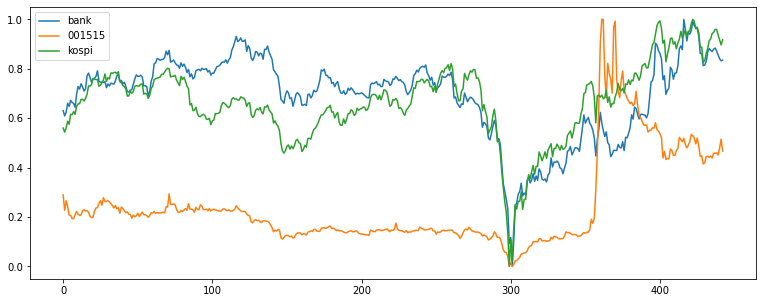

In [15]:
plt.figure(figsize=(13, 5))

plt.plot(
      bank_scaled.index
    , bank_scaled
    , label = 'bank'
)

plt.plot(
    df_001515_scaled.index
    , df_001515_scaled
    , label = '001515'
)

plt.plot(
    kospi_scaled.index
    , kospi_scaled
    , label = 'kospi'
)

plt.legend()
plt.show()

In [ ]:
# 이동평균선 feature 
# 지지 저항 선 (정립?)
# 종목 별로 추세기간은 현저히 다를 수 있다. -> 변동성차이? ( 비트코인경우는 4시간 (거래량 or 가격))
# 코스피 , 코스닥 변동성도 확연히 다름
# 추세 결정 보조 지표 -- 선물옵션 확인 